# Problem Sheet 7

- To be completed by **12noon** on **Wed 20th Nov** and uploaded to [Problem Sheet 7 submission point](https://moodle.bath.ac.uk/mod/assign/view.php?id=1389537) on Moodle.

## Task (a) (Warm-up)

Derive the gradients of:
- $L(\boldsymbol\theta) = \langle \boldsymbol\theta, \mathbf{x} \rangle$ for a fixed $\mathbf{x}\in\mathbb{R}^n$;
- $L(\boldsymbol\theta) = \|\boldsymbol\theta\|_2^2$.

## Solution:

The typical approach is to write vector and matrix products elementwise, and compute a partial derivative with respect to one (but arbitrary) component $\theta_j.$ 

- For the first function, we have:
\begin{align*}
L(\boldsymbol\theta) &= \langle \boldsymbol\theta, \mathbf{x} \rangle = \sum_{i=1}^n \theta_i x_i, & \quad \text{so} \\
\frac{\partial L}{\partial \theta_j} &=  \sum_{i=1}^n \frac{\partial}{\partial \theta_j} (\theta_i x_i) = \sum_{i=1}^n \delta_{i,j} x_i, & \quad \text{where} \\
\delta_{i,j} & = \begin{cases} 1 & \text{if } i=j \\ 0 & \text{otherwise,} \end{cases} 
\end{align*}
since $\theta_i$ is independent of $\theta_j$.
Thus, the sum over $i$ collapses to just 
$$
\frac{\partial L}{\partial \theta_j} = x_j \quad \Rightarrow \quad \nabla L = \mathbf{x}.
$$

- For the second function, 
\begin{align*}
L(\boldsymbol\theta) &= \|\boldsymbol\theta\|_2^2 = \sum_{i=1}^n \theta_i^2, & \quad \text{so} \\
\frac{\partial L}{\partial \theta_j} &=  \sum_{i=1}^n \frac{\partial}{\partial \theta_j} (\theta_i^2) = \sum_{i=1}^n 2 \delta_{i,j} \theta_i, & \text{which gives} \\
\frac{\partial L}{\partial \theta_j} &= 2 \theta_j \quad \Rightarrow \quad \nabla L = 2\boldsymbol\theta.
\end{align*}

## Task (b)
Consider a dataset $\mathbf{D} = \{(\mathbf{x}_1,y_1), \ldots, (\mathbf{x}_m,y_m)\}$ with $\mathbf{x}_i \in \mathbb{R}^n$, $y_i \in \{-1,1\}$, $i=1,\ldots,m$.
- Prove that the gradient of the minus-log-likelihood of the logistic regression of this dataset writes:
$$
\nabla L_{\mathbf{D}}(\boldsymbol\theta) = \sum_{i=1}^m \frac{-y_i \mathbf{x}_i}{1 + \exp(y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle)}.
$$

## Solution:

$$
\nabla L_{\mathbf{D}}(\boldsymbol\theta) = \nabla \sum_{i=1}^m \log(1+\exp(-y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle)) = \sum_{i=1}^m \frac{1}{1+\exp(-y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle)} \exp(-y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle) (-y_i) \nabla \langle \boldsymbol\theta, \mathbf{x}_i \rangle.
$$
The $j$-th partial derivative of the inner product reads
$$
\frac{\partial \langle \boldsymbol\theta, \mathbf{x}_i \rangle}{\partial \theta_j} = \frac{\partial }{\partial \theta_j} \sum_{k=1}^n \theta_k x_{i,k} = x_{i,j}, \quad j=1,\ldots,n,
$$
so $\nabla \langle \boldsymbol\theta, \mathbf{x}_i \rangle = \mathbf{x}_i$.
Dividing the nominator and denominator by $\exp(-y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle)$, we get 
$$
\nabla L_{\mathbf{D}}(\boldsymbol\theta) = \sum_{i=1}^m \frac{-y_i \mathbf{x}_i}{1 + \exp(y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle)}.
$$

## Task (c)

Consider a dataset $\mathbf{D} = \{(\mathbf{x}_1,y_1), \ldots, (\mathbf{x}_m,y_m)\}$ with $\mathbf{x}_i \in \mathbb{R}^n$, $y_i \in \{-1,1\}$, $i=1,\ldots,m$,
and assume that the derivative of $\ell(t):=\max\{t,0\}$ is extended to $\ell'(t) = \begin{cases}1, & t \ge 0, \\ 0, & t<0. \end{cases}$
- Derive the gradient of the Soft SVM empirical risk,
$$
L_{\mathbf{D}}(\boldsymbol\theta) = \lambda \|\boldsymbol\theta\|_2^2 + \frac{1}{m} \sum_{i=1}^m \max\{1-y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle, 0\}.
$$
- How does the Gradient Descent iteration optimising the Soft SVM empirical risk compare to the Perceptron iteration?

## Solution:

Similarly to Task (a),
$$
\nabla \max\{1-y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle, 0\} = \ell'(1-y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle) (-y_i \mathbf{x}_i),
$$
and $\nabla (\lambda \|\boldsymbol\theta\|_2^2) = 2\lambda \boldsymbol\theta.$ Thus,
$$
\nabla L_{\mathbf{D}}(\boldsymbol\theta) = 2\lambda \boldsymbol\theta - \frac{1}{m} \sum_{i=1}^m \begin{cases}y_i \mathbf{x}_i, & y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle \le 1, \\ 0, & \text{otherwise.}\end{cases}
$$
One iteration of GD is then
$$
\boldsymbol\theta^{k+1} = \boldsymbol\theta^k - t \nabla L_{\mathbf{D}}(\boldsymbol\theta^k) = (1-2t\lambda) \boldsymbol\theta^k + \frac{t}{m} \sum_{i=1}^m \begin{cases}y_i \mathbf{x}_i, & y_i \langle \boldsymbol\theta^k, \mathbf{x}_i \rangle \le 1, \\ 0, & \text{otherwise.}\end{cases}
$$
One iteration of Perceptron is 
$$
\boldsymbol\theta^{k+1} = \boldsymbol\theta^k + \begin{cases}y_i \mathbf{x}_i, & y_i \langle \boldsymbol\theta^k, \mathbf{x}_i \rangle \le 0, \\ 0, & \text{otherwise.}\end{cases}
$$
Thus, the Soft SVM GD increments the parameter with the same vector $y_i \mathbf{x}_i$, but:
- this vector is weighted differently depending on the penalty parameter $\lambda$ and the learning rate $t$.
- The update is applied unless the classification of $(\mathbf{x}_i,y_i)$ is _significantly correct_, not just correct.
- The update consists of all data points at once instead of using only one data point.

---

## Task 1: logistic regression

Consider the following dataset:

In [1]:
import numpy as np
X = np.vstack([np.linspace(-3,3,9).reshape(-1,1) + np.array([0, 1]),
               np.linspace(-3,3,9).reshape(-1,1) + np.array([0,-1])])
y = np.hstack((np.ones(9), -np.ones(9)))

- Write a Python function `L(theta,X,y)` that takes as input a parameter vector `theta`=$\boldsymbol\theta\in\mathbb{R}^n$, a matrix `X`$\in\mathbb{R}^{m \times n}$ of row vectors $\mathbf{x}_1,\ldots,\mathbf{x}_m \in \mathbb{R}^n$ stacked vertically, and a vector of labels `y`=$(y_1,\ldots,y_m)$, and returns the minus-log-likelihood $L_{\mathbf{D}}(\boldsymbol\theta)$ of the logistic regression of the dataset $\mathbf{D}$=(`X`,`y`) at the parameter `theta`.
- Write a Python function `gL(theta,X,y)` that takes the same inputs as `L(theta,X,y)`, and returns the gradient vector $\nabla L_{\mathbf{D}}(\boldsymbol\theta)$ derived in Task (b).

In [2]:
# Logistic regression minus-log-likelihood and its gradient
def L(theta, X,y):
    return np.sum(np.log(1+np.exp(-y*(X@theta))))

def gL(theta, X,y):
    return np.sum(-y.reshape(-1,1) * X / np.reshape(1+np.exp(y*(X@theta)), (-1,1)), axis=0)

## Task 2

- Write a Python code using [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function (introduced in the previous problem sheet) to minimize $L_{\mathbf{D}}$ from Task 1, starting from a zero initial guess.
- Write a Python code to plot $\mathbf{x}_1,\ldots,\mathbf{x}_m$ from Task 1 as points in $\mathbb{R}^2$, and the separating line corresponding to $\boldsymbol\theta^*$ produced by scipy.optimize.minimize on the same plot. You may want to restrict `xlim` and `ylim` of the plot to $[-4,4]$ for convenient picture.
- How accurate is the separating line visually, and how small is $\|\nabla L_{\mathbf{D}}(\boldsymbol\theta^*)\|_2$?

_Hint: the separating line equation reads_ $\langle \boldsymbol\theta^*, \mathbf{x}\rangle = 0$, _so the points on the line can be calculated as_ $\mathbf{x} = t \left[\theta_2^*, -\theta_1^*\right]$ _for_ $t\in\mathbb{R},$ _which you can restrict to_ $t \in [-1,1]$ _for plotting._

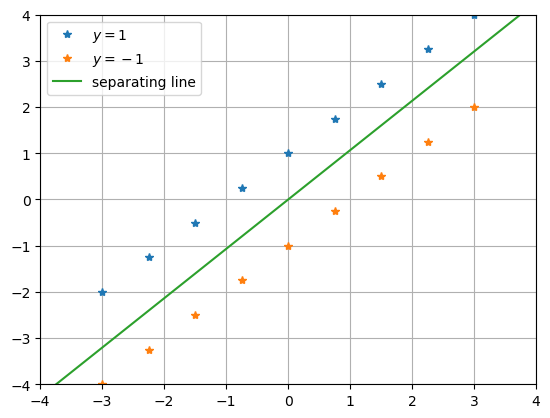

gL(theta_star) = 8.550364874472344e-06
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.981172226648795e-06
        x: [-1.927e+01  1.804e+01]
      nit: 23
      jac: [-4.974e-06 -6.955e-06]
 hess_inv: [[ 3.673e+05 -3.343e+05]
            [-3.343e+05  3.042e+05]]
     nfev: 25
     njev: 25


In [3]:
from matplotlib import pyplot as plt
from scipy.optimize import minimize

sol = minimize(lambda theta: L(theta,X,y), np.zeros(2), jac=lambda theta: gL(theta,X,y))
theta_star = sol.x

plt.plot(X[y==1,0], X[y==1,1], '*')
plt.plot(X[y==-1,0], X[y==-1,1], '*')
plt.plot(np.array([-1,1])*theta_star[1], -np.array([-1,1])*theta_star[0])
plt.legend(['$y=1$', '$y=-1$', 'separating line'])
plt.grid()
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

print(f"gL(theta_star) = {np.linalg.norm(gL(theta_star,X,y))}")
print(sol)  # Not needed but may be useful for further diagnostics

## Task 3
- Copy over the Gradient Descent function `gd` from the `GD.ipynb` demonstration notebook here.
- Modify the `gd` function to plot the values of the loss function $L_{\mathbf{D}}(\boldsymbol\theta^k)$ at each iteration of the algorithm.
- Repeat computations of Task 2 but replacing `scipy.optimize.minimize` with `gd` to find $\boldsymbol\theta^*$.
- What happens? How accurate is the separating line visually, and how small is $\|\nabla L_{\mathbf{D}}(\boldsymbol\theta^*)\|_2$?

/tmp/ipykernel_30995/3609862858.py:3: RuntimeWarning: overflow encountered in exp
  return np.sum(np.log(1+np.exp(-y*(X@theta))))
/usr/lib/python3.12/site-packages/scipy/optimize/_optimize.py:2289: RuntimeWarning: invalid value encountered in scalar multiply
  q = (xf - fulc) * (fx - fnfc)
/usr/lib/python3.12/site-packages/scipy/optimize/_optimize.py:2288: RuntimeWarning: invalid value encountered in scalar subtract
  r = (xf - nfc) * (fx - ffulc)
/usr/lib/python3.12/site-packages/scipy/optimize/_optimize.py:2289: RuntimeWarning: invalid value encountered in scalar subtract
  q = (xf - fulc) * (fx - fnfc)
/tmp/ipykernel_30995/3609862858.py:6: RuntimeWarning: overflow encountered in exp
  return np.sum(-y.reshape(-1,1) * X / np.reshape(1+np.exp(y*(X@theta)), (-1,1)), axis=0)


converged in 5 iterations


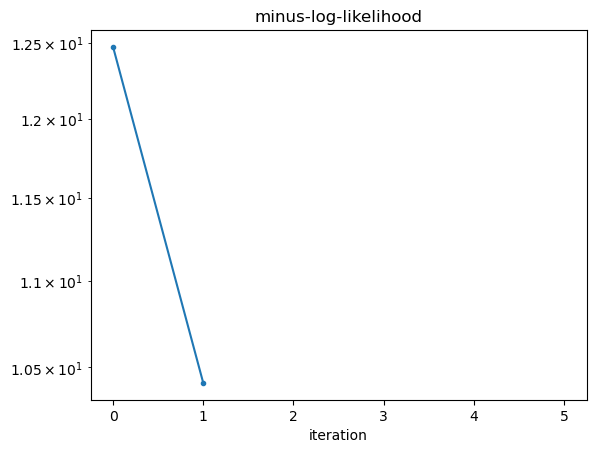

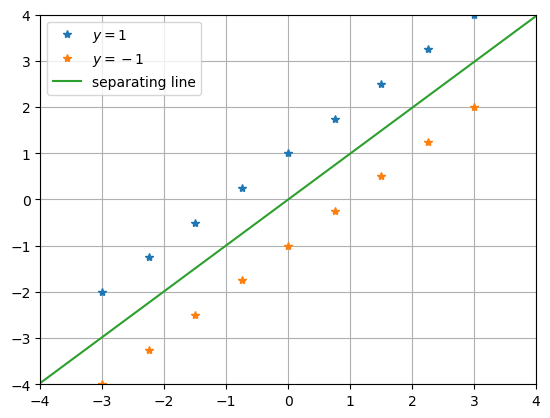

gL(theta_star) = 0.0


In [4]:
from scipy.optimize import fminbound

def gd(L, gL, theta0, eps=1e-6, max_iters=100):
    theta = theta0
    Thetas = []
    Losses = []
    for k in range(max_iters):
        gLk = gL(theta)
        Losses.append(L(theta))
        if (np.linalg.norm(gLk) < eps):
            print(f"converged in {k} iterations")
            break
        tk = fminbound(lambda t: L(theta - t * gLk), 0, 100)
        theta = theta - tk * gLk
        Thetas.append(theta)
    plt.semilogy(Losses, '.-')
    plt.xlabel('iteration')
    plt.title('minus-log-likelihood')
    plt.show()
    return theta, np.array(Thetas)

theta_star, _ = gd(lambda theta: L(theta,X,y), lambda theta: gL(theta,X,y), np.zeros(2))

plt.plot(X[y==1,0], X[y==1,1], '*')
plt.plot(X[y==-1,0], X[y==-1,1], '*')
plt.plot(np.array([-1,1])*theta_star[1], -np.array([-1,1])*theta_star[0])
plt.legend(['$y=1$', '$y=-1$', 'separating line'])
plt.grid()
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

print(f"gL(theta_star) = {np.linalg.norm(gL(theta_star,X,y))}")